# ML/AI Engineering Foundations: Final Portfolio
The following Jupyter notebook was created as a part of the final project for\
the Codecademy course 
["ML/AI Engineering Foundations"](https://www.codecademy.com/learn/paths/machine-learning|ai|engineering|foundations). 

## Topic
This project will investigate the relationship between book genre and sales \
over time. In order to do this the following dataset will be used:\
[Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

This dataset is described by it's author as the following:
> Salaries of jobs in the Data Science domain

This data set contains the following fields:
| Field                 | Description                                                                                                                                                                                       |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| work_year             | The year the salary was paid.                                                                                                                                                                     |
| experience_level      | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director    |
| employment_type       | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance                                                                                                          |
| salary                | The total gross salary amount paid.                                                                                                                                                               |
| job_title             | The role worked in during the year.                                                                                                                                                               |
| salary_currency       | The currency of the salary paid as an ISO 4217 currency code.                                                                                                                                     |
| salary_in_usd         | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).                                                                                             |
| employee_residence    | Employee's primary country of residence in during the work year as an ISO 3166 country code.                                                                                                      |
| remote_ratio          | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)                                   |
| company_location      | The country of the employer's main office or contracting branch as an ISO 3166 country code.                                                                                                      |
| company_size          | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)                       |

The bellow cell is used in to import the dataset (not included within the\
repository as including the dataset this way can be bad practice, as a dataset\
can easily be very large and complex):

In [1]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files(dataset = 'ruchi798/data-science-job-salaries', path = './', unzip = True)

## Data Analysis
With the dataset selected, the next step of the project is to determine how\
this dataset might be analysed. As mentioned, the intended analysis for this\
project is to investigate the relationship between sales and genre, In order to\
do this the following tasks must be completed:
- Load dataset into dataframe
- Separate datapoints by genre and year
- 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ds_salaries.csv')

print(df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [7]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [10]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [11]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [26]:
def convert_sales(sales):
    if sales.startswith('Over'):
        return float(sales.split()[1])
    elif '>' in sales:
        sales = sales.replace('million', '')
        return float(sales.split('>')[1].split()[0])
    elif '-' in sales or '–' in sales:  # Checking for both types of dashes
        sales = sales.replace('million', '')
        sales = sales.replace('–', '-')  # Replace '–' with '-'
        return (float(sales.split('-')[0]) + float(sales.split('-')[1])) / 2
    elif 'million' in sales:
        return float(sales.split()[0].replace('million', ''))
    else:
        try:
            return float(sales)
        except ValueError:
            return None
    
df['Approximate sales'] = df['Approximate sales'].apply(convert_sales)

print(df['Approximate sales'].unique)

<bound method Series.unique of 0      200.0
1      200.0
2      120.0
3      100.0
4      100.0
       ...  
169     10.0
170     10.0
171     10.0
172     10.0
173     10.0
Name: Approximate sales, Length: 174, dtype: float64>


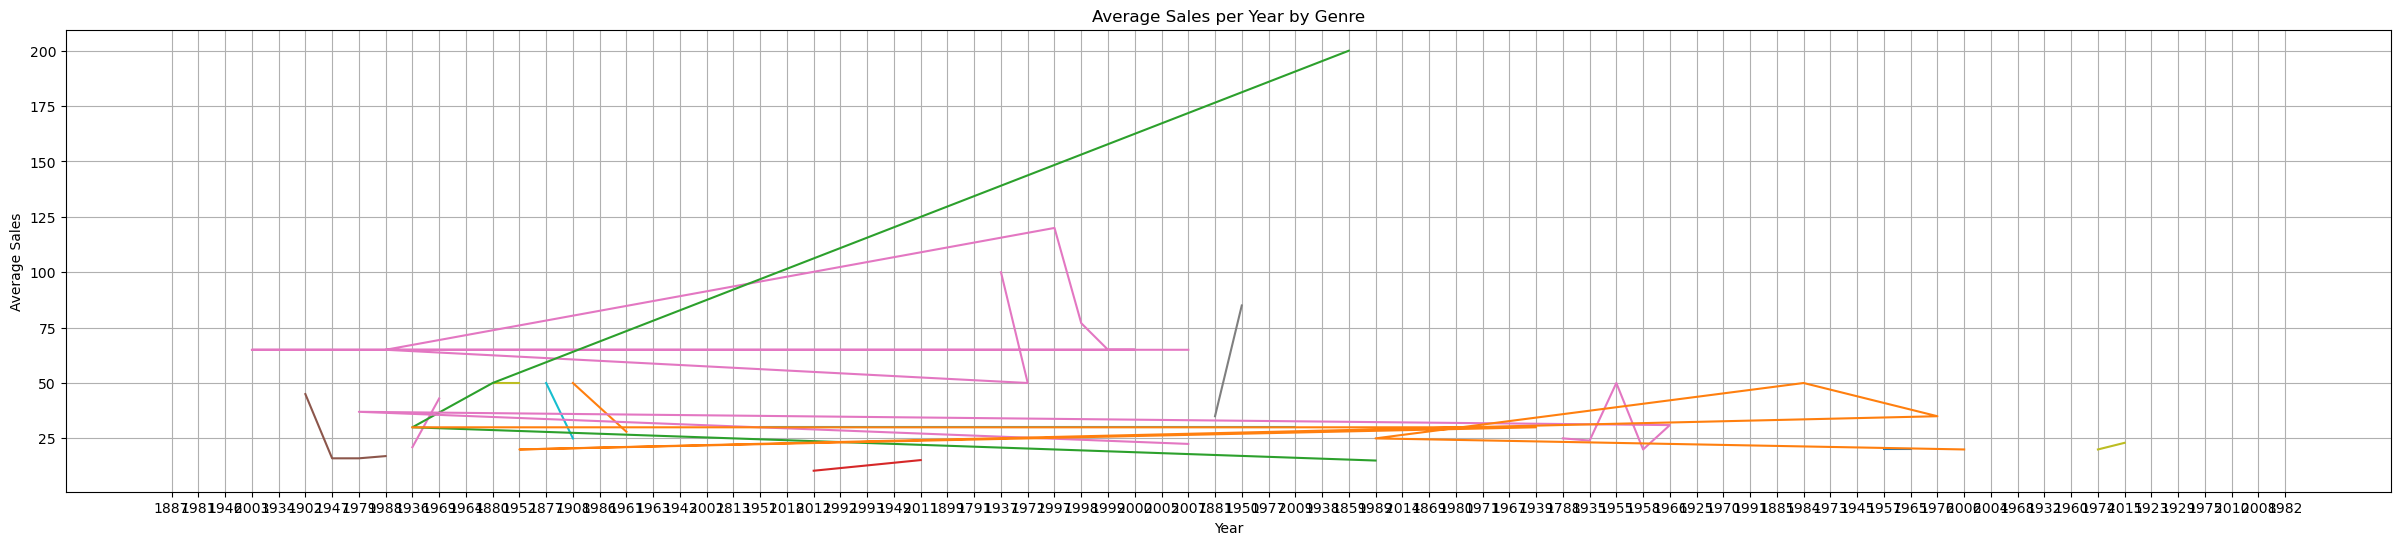

In [27]:
genre_year_sales = df.groupby(['Genre', 'First published'])['Approximate sales'].mean().reset_index()

plt.figure(figsize=(30, 6))

for genre in genre_year_sales['Genre'].unique():
    genre_data = genre_year_sales[genre_year_sales['Genre'] == genre]
    plt.plot(genre_data['First published'], genre_data['Approximate sales'], label=genre)
    
plt.title('Average Sales per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Average Sales')
# plt.legend()
plt.grid(True)
plt.show()